## Data Preparation and Model Import
Initial setup including importing required libraries and loading the balanced training data and testing data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# Read the data
training_data = pd.read_csv('training_data.csv')
testing_data = pd.read_csv('testing_data.csv')

## Original Model Training and Evaluation
Training the initial SVM model on the balanced data and evaluating its performance.

In [2]:
# Separate features and target variable from training data
X_train = training_data.drop('y', axis=1)
y_train = training_data['y']

# Separate features and target variable from testing data
X_test = testing_data.drop('y', axis=1)
y_test = testing_data['y']

# Initialize the SVM model
model = SVC(probability=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       124
         1.0       0.00      0.00      0.00       124

    accuracy                           0.50       248
   macro avg       0.25      0.50      0.33       248
weighted avg       0.25      0.50      0.33       248



c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [3]:
# Read the SMOTE balanced training data
training_data_smote = pd.read_csv('training_balanced_smote.csv')

# Separate features and target variable from SMOTE training data
X_train_smote = training_data_smote.drop('y', axis=1)
y_train_smote = training_data_smote['y']

# Initialize the SVM model
model_smote = SVC(probability=True)

# Train the model with SMOTE data
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the testing data
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote)

print(f'Accuracy with SMOTE: {accuracy_smote}')
print('Classification Report with SMOTE:')
print(report_smote)

Accuracy with SMOTE: 0.6451612903225806
Classification Report with SMOTE:
              precision    recall  f1-score   support

         0.0       0.60      0.86      0.71       124
         1.0       0.76      0.43      0.55       124

    accuracy                           0.65       248
   macro avg       0.68      0.65      0.63       248
weighted avg       0.68      0.65      0.63       248



## Model Performance Visualization
Generating and plotting ROC curves to compare the performance of both models:

- Calculates ROC curves and AUC scores
- Visualizes discrimination ability of both models
- Plots true positive rate vs false positive rate

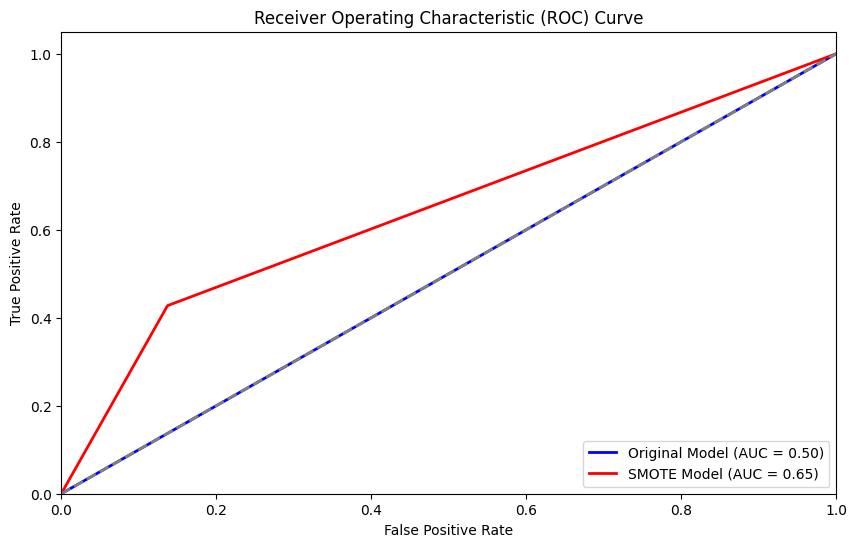

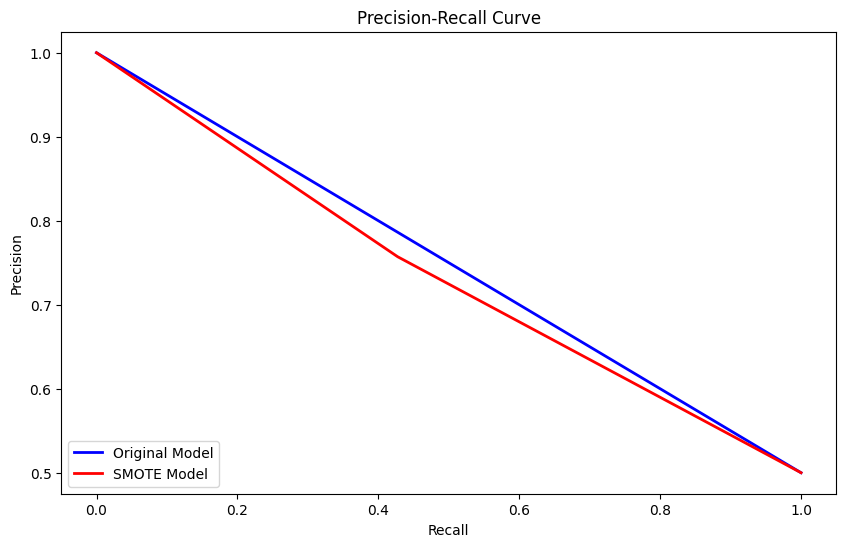

In [4]:
# Calculate ROC curve and AUC for the original model
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate ROC curve and AUC for the SMOTE model
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original Model (AUC = {roc_auc:.2f})')
plt.plot(fpr_smote, tpr_smote, color='red', lw=2, label=f'SMOTE Model (AUC = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the Precision-Recall curves
precision, recall, _ = precision_recall_curve(y_test, y_pred)
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_pred_smote)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Original Model')
plt.plot(recall_smote, precision_smote, color='red', lw=2, label='SMOTE Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()